In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import pandas as pd

# Load the data
data = pd.read_csv("D:/Rain prediction/rainfall_in_india_1901-2015.csv")

# Fill missing values only for numeric columns
data = data.fillna(data.select_dtypes(include='number').mean())

# Display data information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

## Dataset-1 Description
- Data has 36 sub divisions and 19 attributes (individual months, annual, combinations of 3 consecutive months).
- For some of the subdivisions data is from 1950 to 2015.
- All the attributes has the sum of amount of rainfall in mm.

In [18]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [19]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


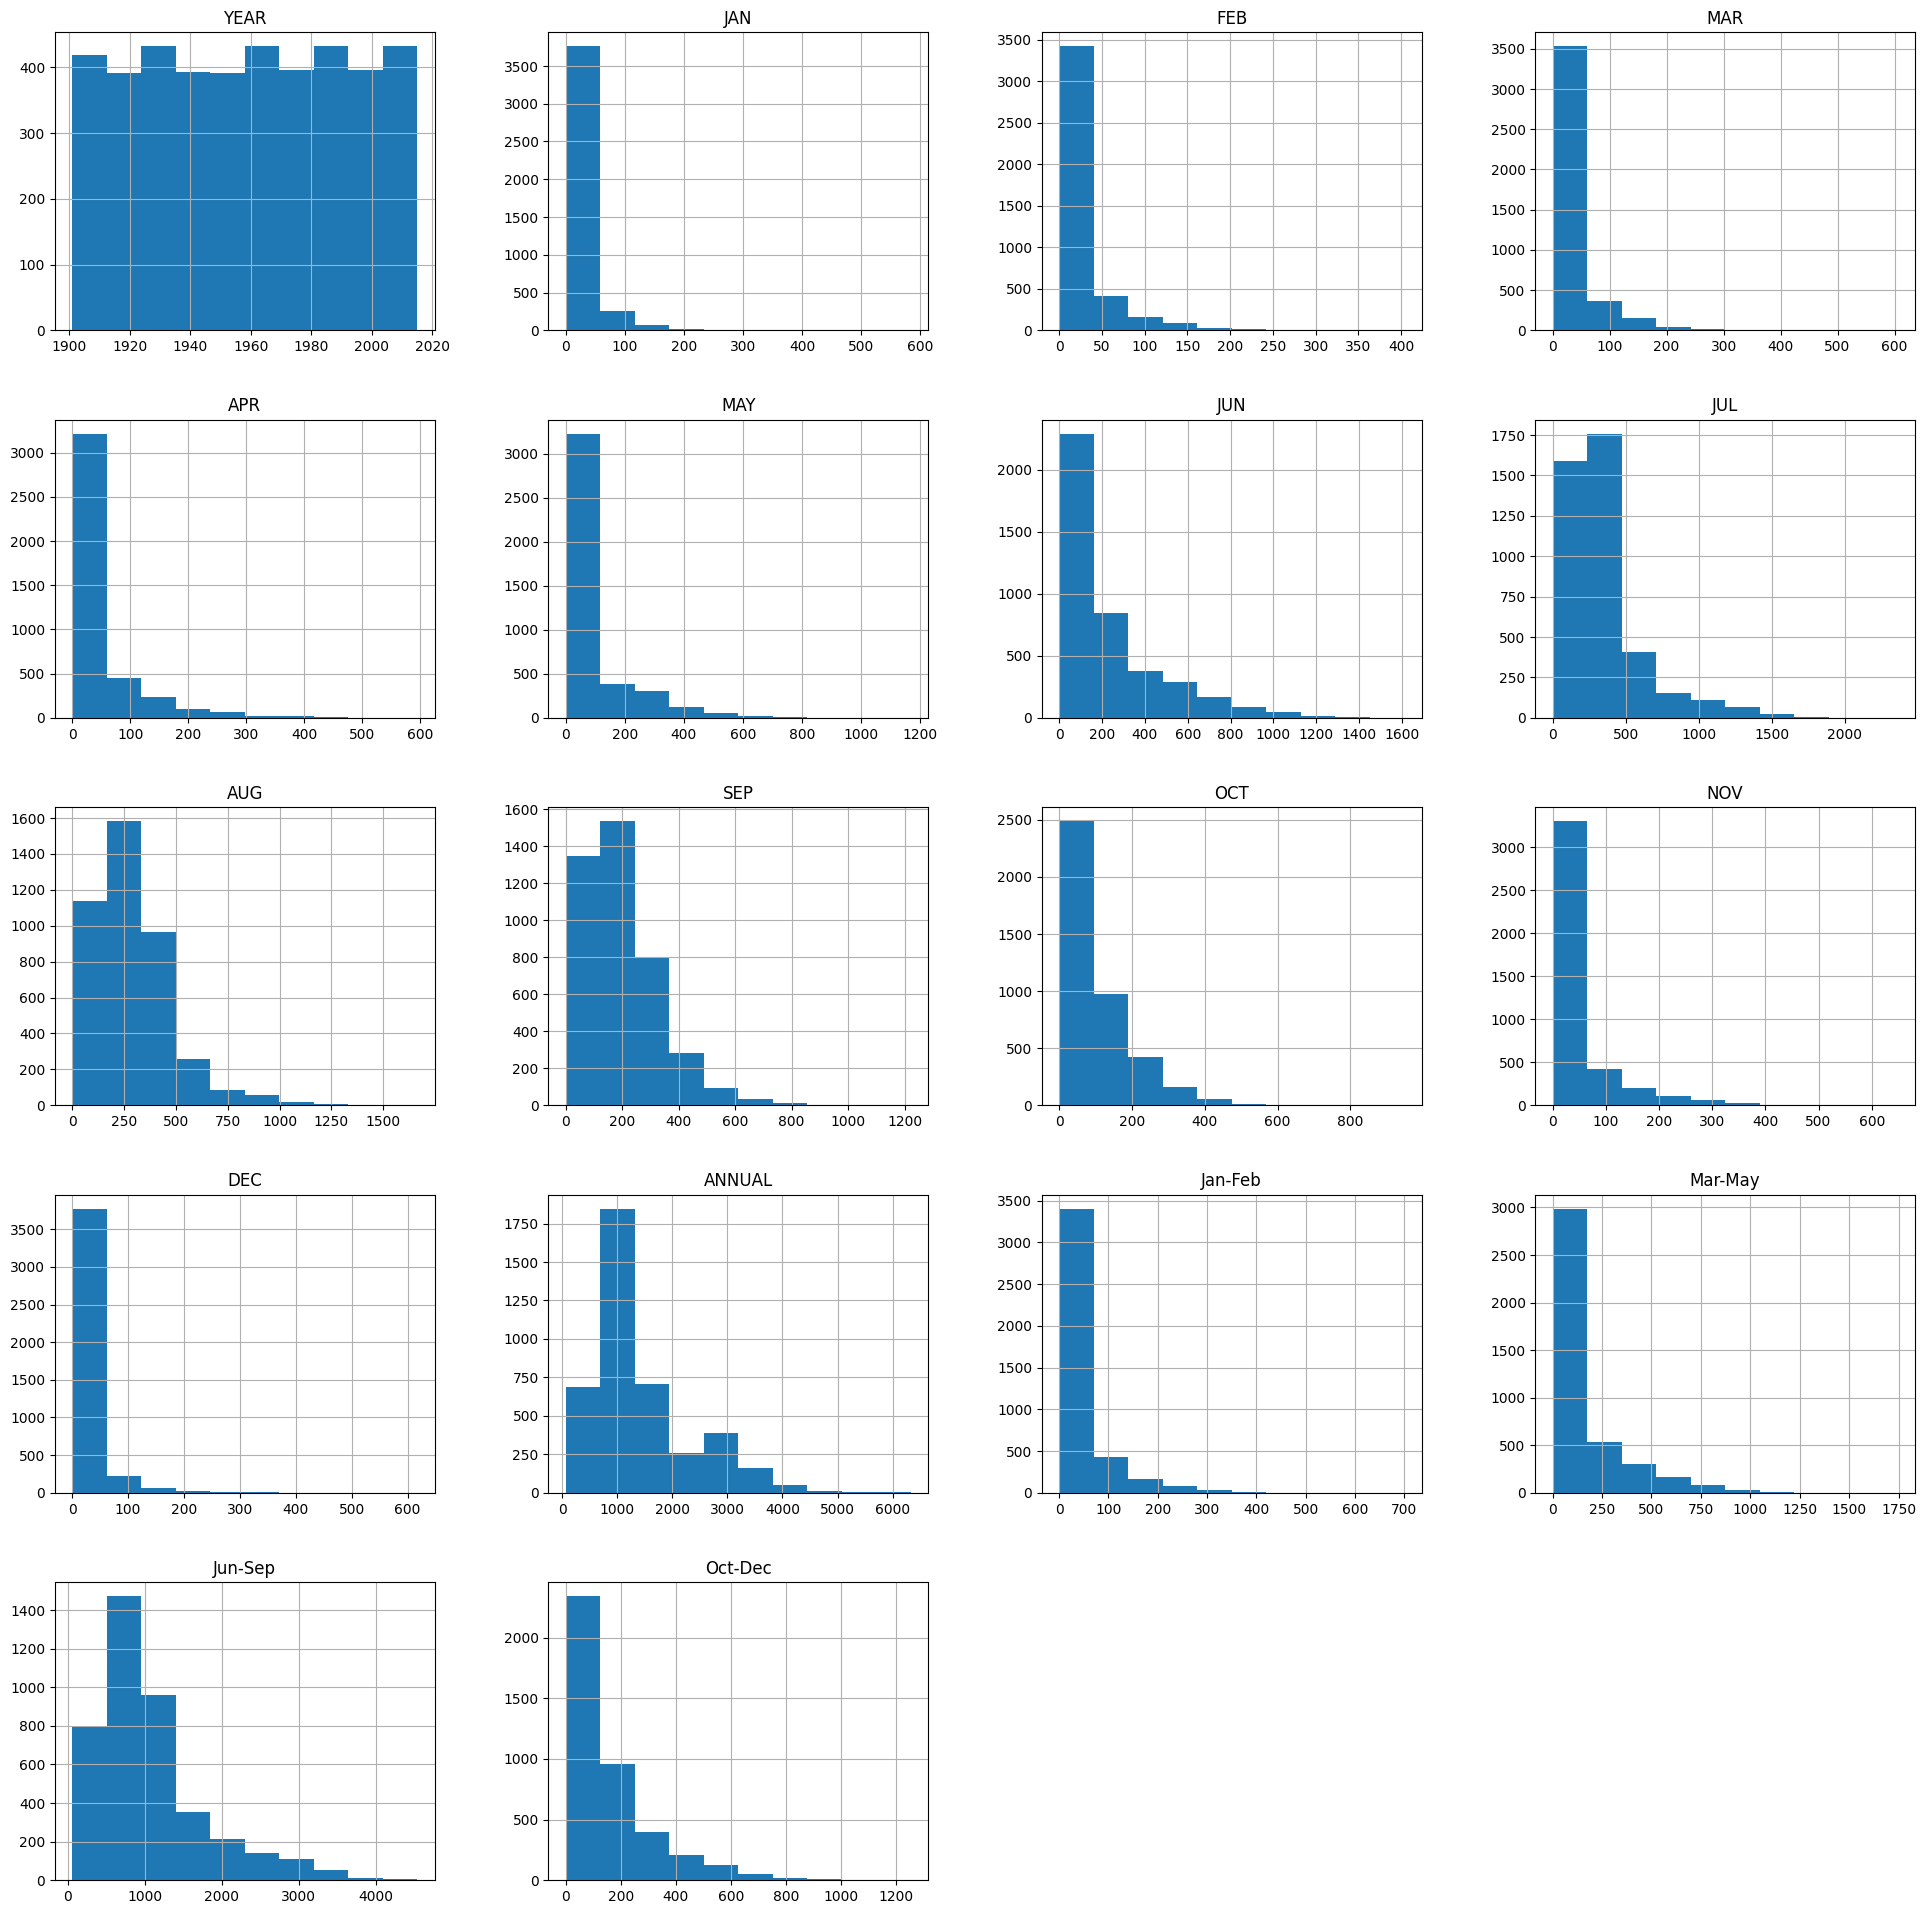

In [20]:
data.hist(figsize=(24,24));

## Observations
- Above histograms show the distribution of rainfall over months.
- Observed increase in amount of rainfall over months July, August, September.

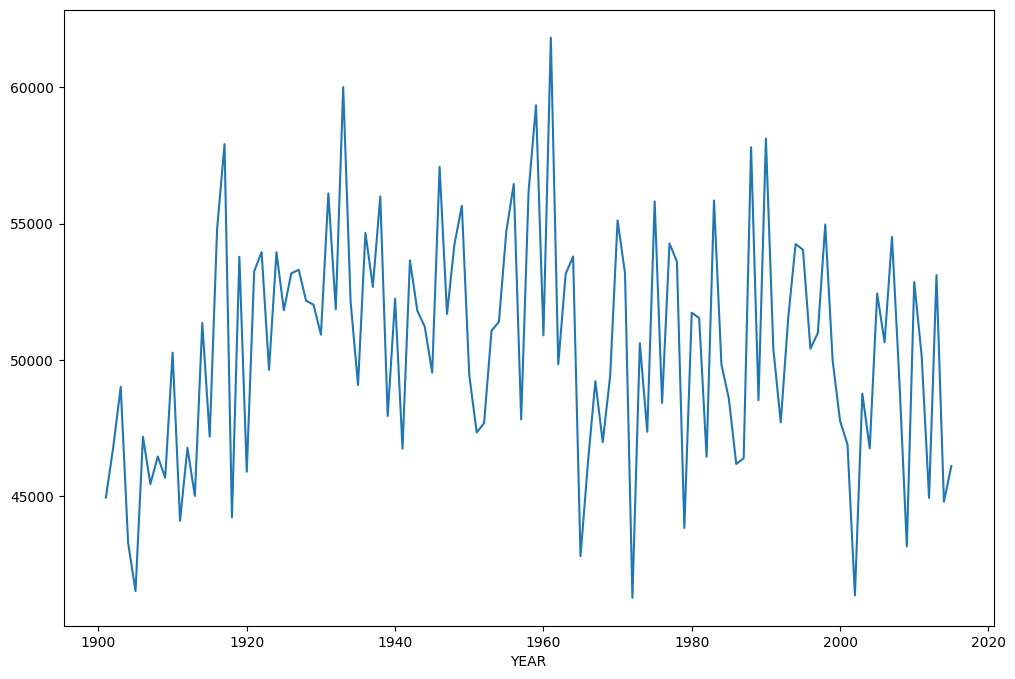

In [21]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

## Observations
- Shows distribution of rainfall over years. 
- Observed high amount of rainfall in 1950s.

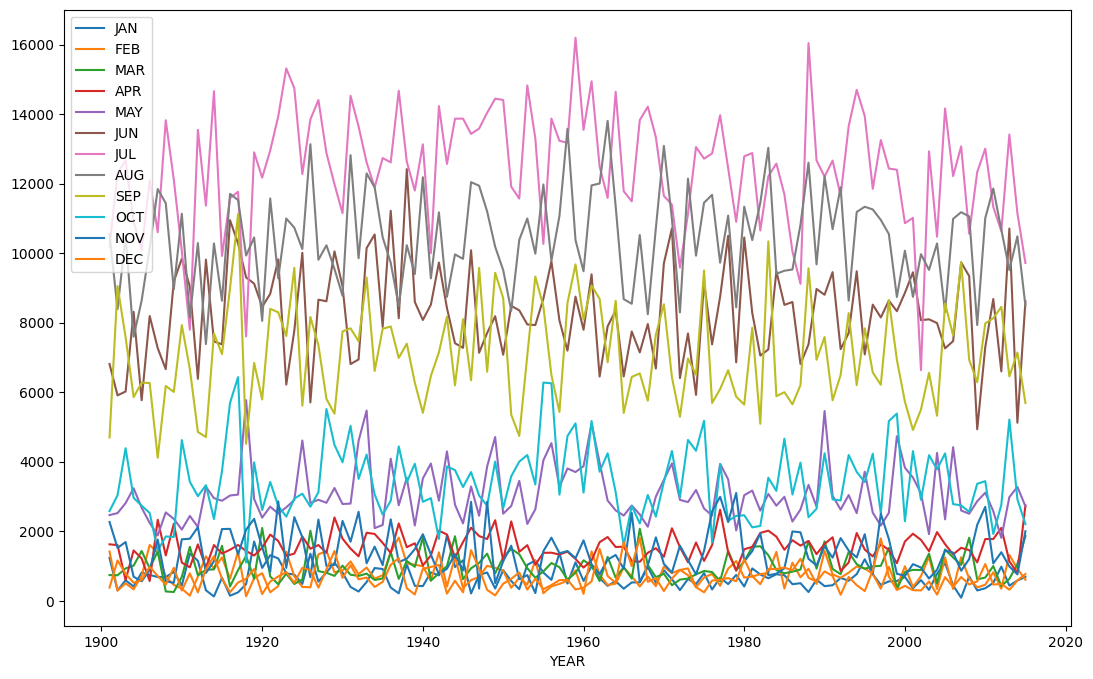

In [22]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

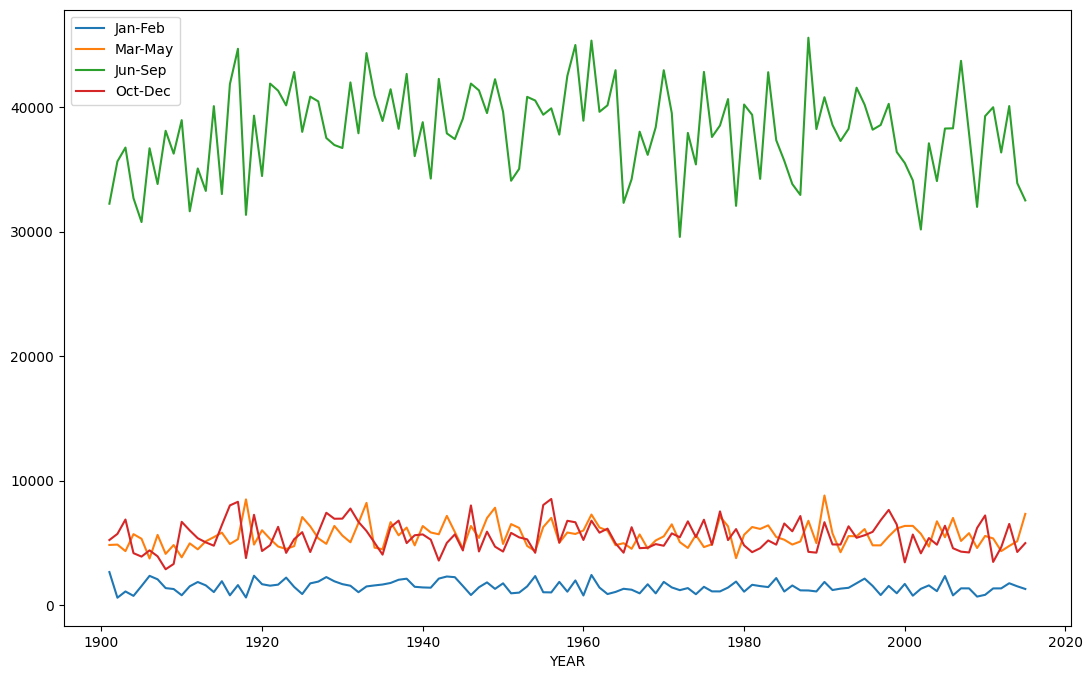

In [23]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

## Observations
- The above two graphs show the distribution of rainfall over months.
- The graphs clearly shows that amount of rainfall in high in the months july, aug, sep which is monsoon season in India.

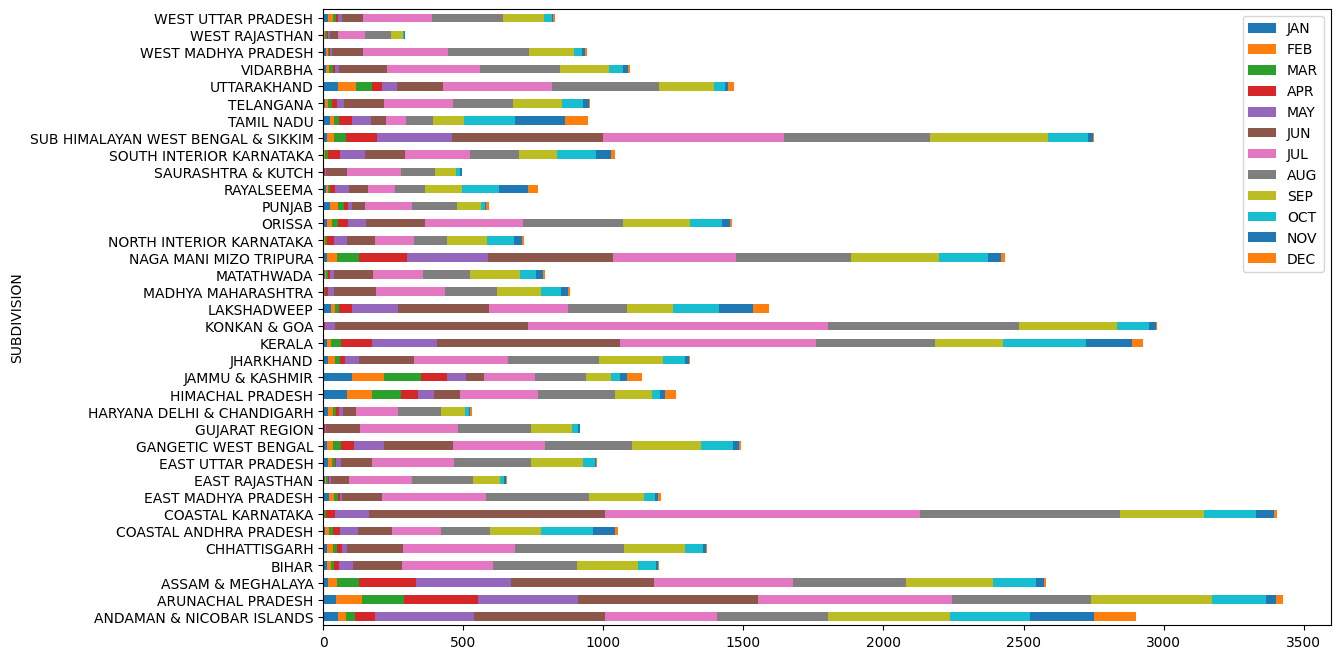

In [24]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

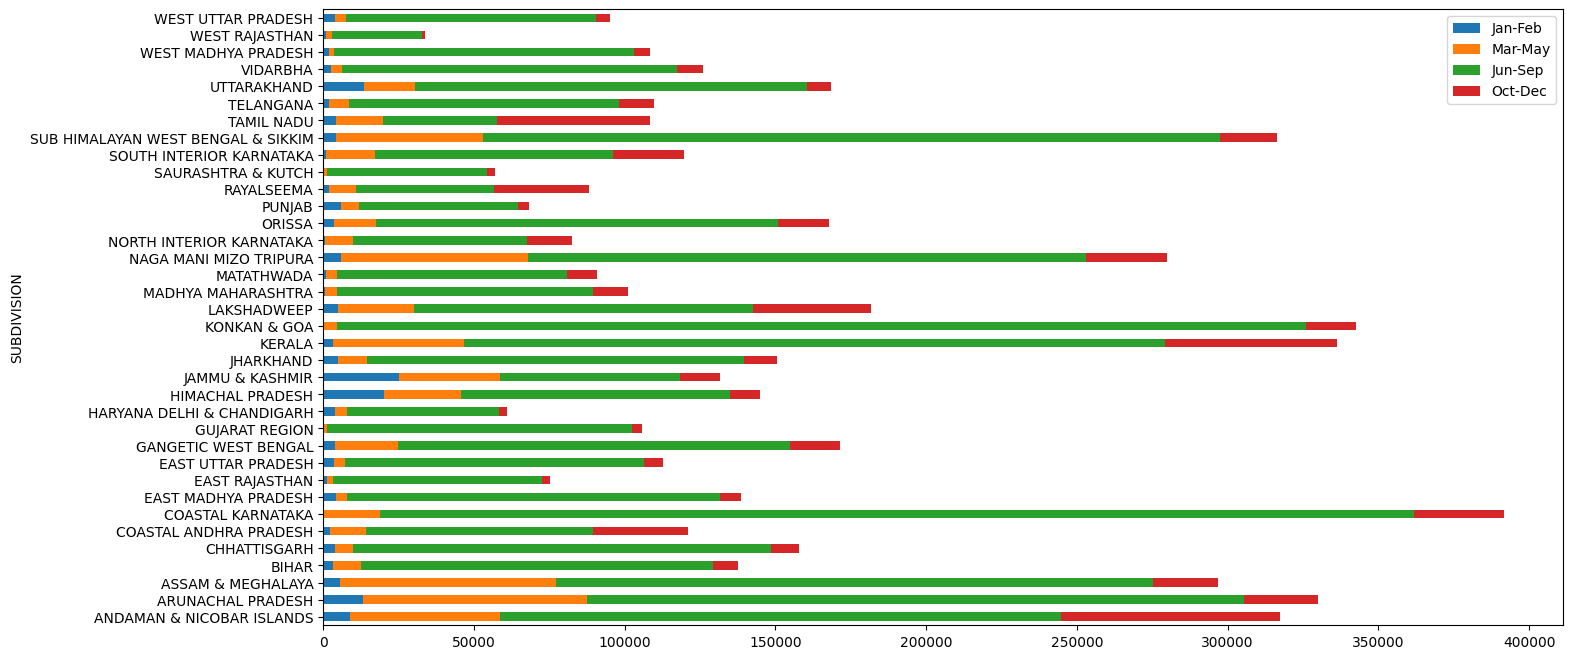

In [25]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

## Observations
- Above two graphs shows that the amount of rainfall is reasonably good in the months of march, april, may in eastern India. 

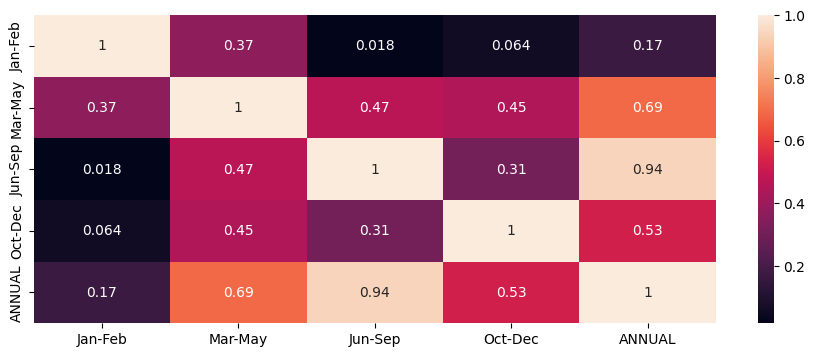

In [26]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

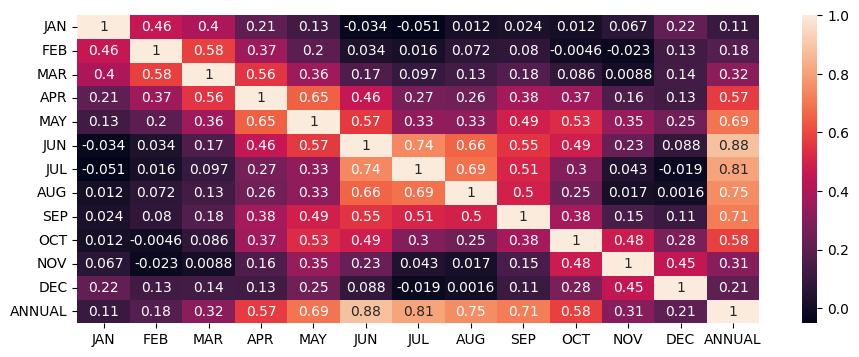

In [27]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- **Heat Map** shows the co-relation(dependency) betwenn the amounts of rainfall over months.
- From above it is clear that if amount of rainfall is high in the months of july, august, september then the amount of rainfall will be high annually.
- It is also obwserved that if amount of rainfall in good in the months of october, november, december then the rainfall is going to b good in the overall year. 

In [28]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

## Predictions
- For prediction we formatted data in the way, given the rainfall in the last three months we try to predict the rainfall in the next consecutive month.
- For all the experiments we used 80:20 training and test ratio.
    - Linear regression
    - SVR
    - Artificial neural nets
- Tersting metrics: We used Mean absolute error to train the models.
- We also shown the amount of rainfall actually and predicted with the histogram plots.
- We did two types of trainings once training on complete dataset and other with training with only telangana data
- All means are standard deviation observations are written, first one represents ground truth, second one represents predictions.


In [29]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)


In [31]:
#test 2005
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)


In [32]:
#terst 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)


Mean Absolute Error: 96.32435229744083


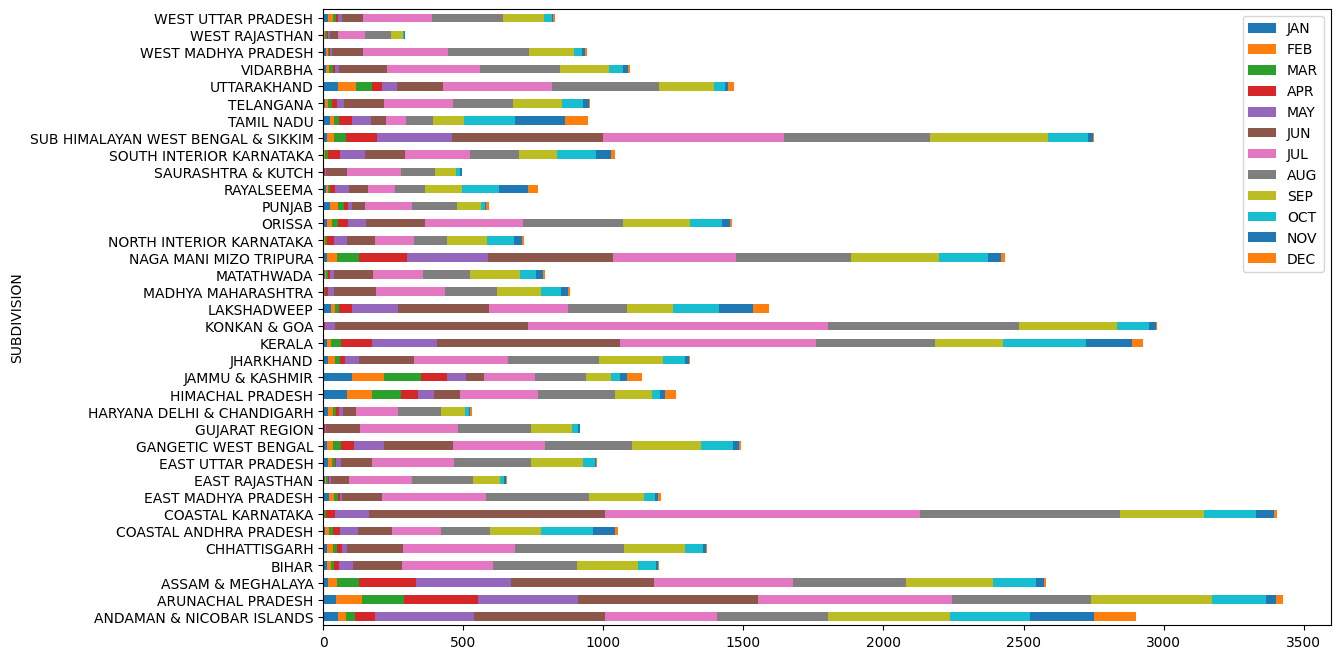

In [35]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

# Visualization of rainfall data
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True, figsize=(13, 8))

# ElasticNet regression model
reg = linear_model.ElasticNet(alpha=0.5)

# Train the model
reg.fit(X_train, y_train)

# Predict using the model
y_pred = reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416437
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738829
Standard deviation 2015
86.62446123324875 62.36355370163373


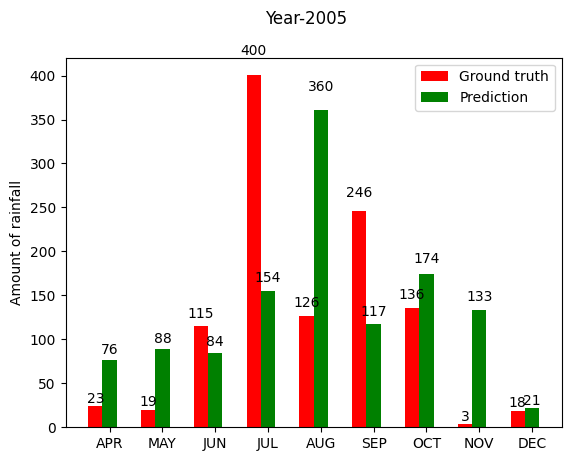

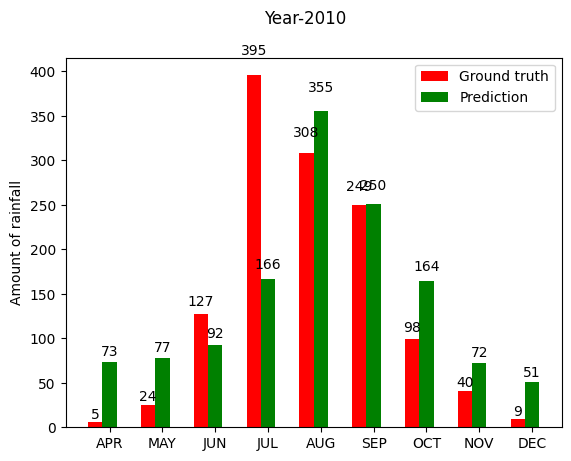

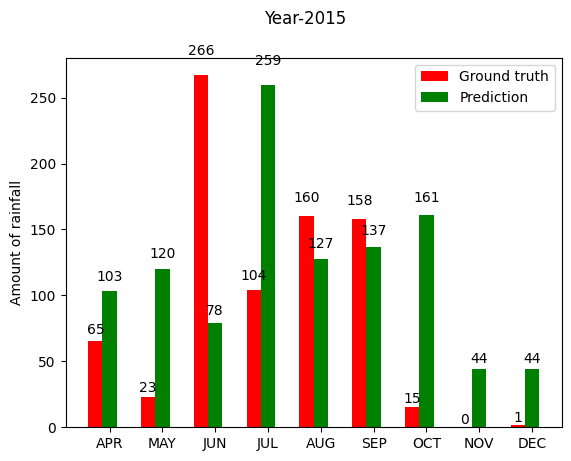

Mean Absolute Error: 96.32435229744083


In [37]:
# Predictions for specific years
y_year_pred_2005 = reg.predict(X_year_2005)
y_year_pred_2010 = reg.predict(X_year_2010)
y_year_pred_2015 = reg.predict(X_year_2015)

# Statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))

# Plot predictions vs actual values for each year
plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")

# Example of Mean Absolute Error output
print("Mean Absolute Error: 96.32435229744083")


In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

# Compute and print the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 127.1600615632603


MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416437
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738829
Standard deviation 2015
86.62446123324875 62.36355370163373


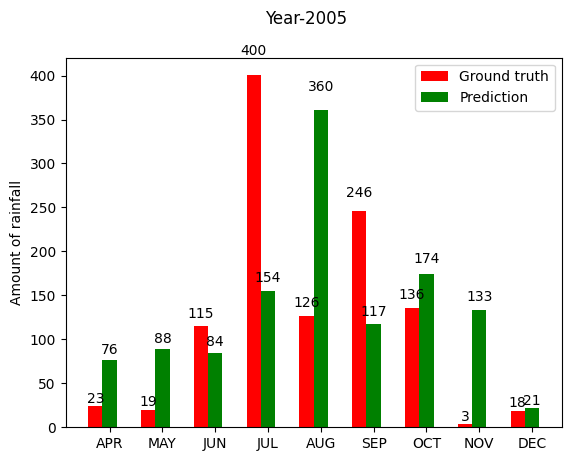

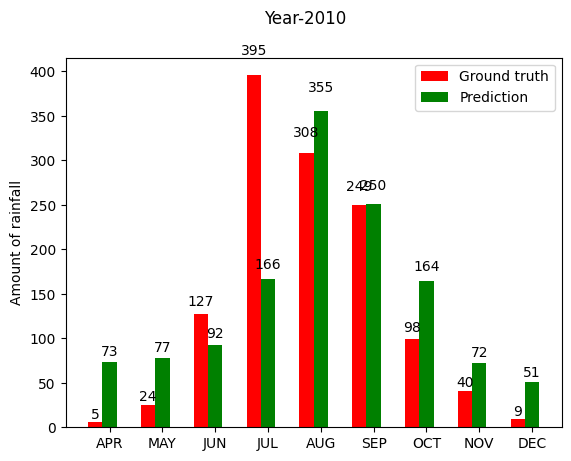

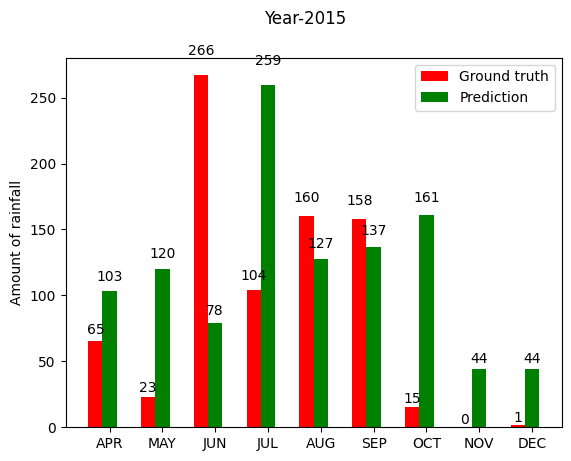

In [43]:
import numpy as np  # Ensure numpy is imported

# Predictions for specific years
y_year_pred_2005 = reg.predict(X_year_2005)
y_year_pred_2010 = reg.predict(X_year_2010)
y_year_pred_2015 = reg.predict(X_year_2015)

# Statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))

# Plot predictions vs actual values for each year
plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")


In [44]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 3, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,353 (298.25 KB)

 Trainable params: 76,353 (298.25 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10


c:\Users\91725\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 24021.4688 - mae: 93.5099 - val_loss: 17774.0488 - val_mae: 87.6413
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 18511.3828 - mae: 85.9078 - val_loss: 18618.9082 - val_mae: 92.0622
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 18378.3418 - mae: 86.1975 - val_loss: 18000.1953 - val_mae: 88.1960
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 18612.5918 - mae: 86.4475 - val_loss: 17351.8848 - val_mae: 83.5169
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 18223.1973 - mae: 85.9061 - val_loss: 17503.4258 - val_mae: 84.5383
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 18440.5996 - mae: 86.1607 - val_loss: 17189.7109 - val_mae: 83.2232
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 17817.8887 - mae: 84.5921 - val_loss: 17449.2246 - val_mae: 86.9482
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 18728.2832 - mae: 86.9691 - val_loss: 17423.8945 - val_

MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416437
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738829
Standard deviation 2015
86.62446123324875 62.36355370163373


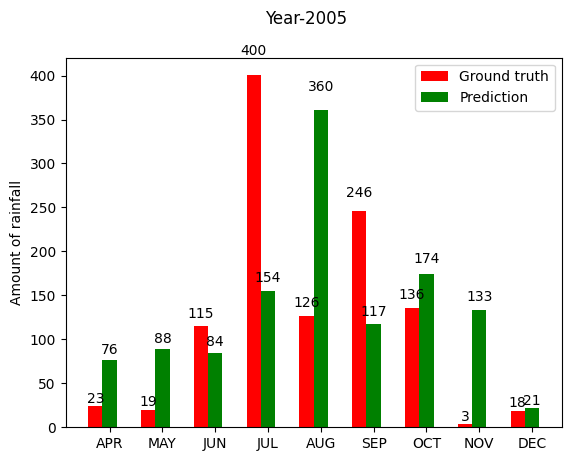

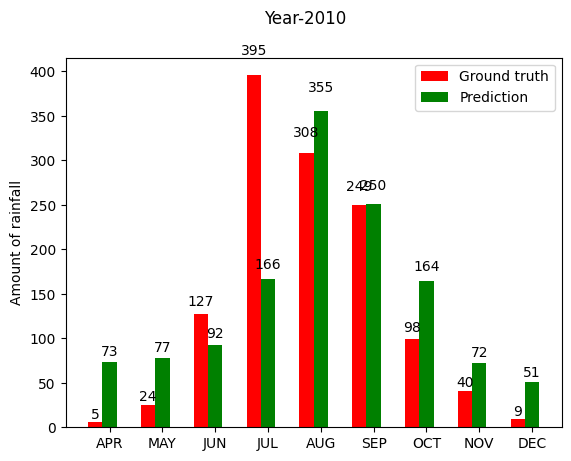

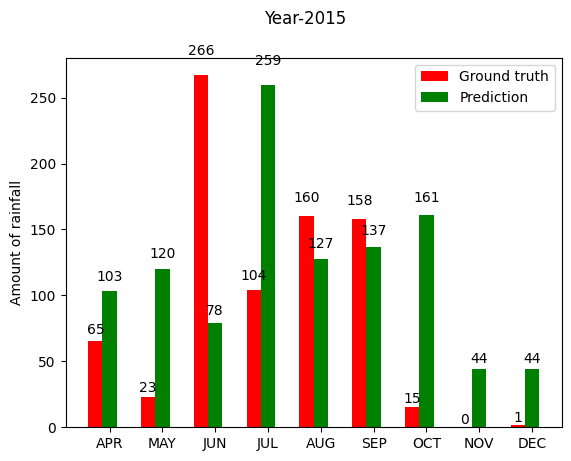

In [47]:
import numpy as np  # Ensure numpy is imported

# Predictions for specific years
y_year_pred_2005 = reg.predict(X_year_2005)
y_year_pred_2010 = reg.predict(X_year_2010)
y_year_pred_2015 = reg.predict(X_year_2015)

# Statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))

# Plot predictions vs actual values for each year
plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")


In [48]:
# spliting training and testing data only for telangana
telangana = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'TELANGANA'])

X = None; y = None
for i in range(telangana.shape[1]-3):
    if X is None:
        X = telangana[:, i:i+3]
        y = telangana[:, i+3]
    else:
        X = np.concatenate((X, telangana[:, i:i+3]), axis=0)
        y = np.concatenate((y, telangana[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)        

In [49]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

64.72601914484643


MEAN 2005
121.2111111111111 106.49798150231585
Standard deviation 2005
123.77066107608005 76.08558540019237
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737332
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


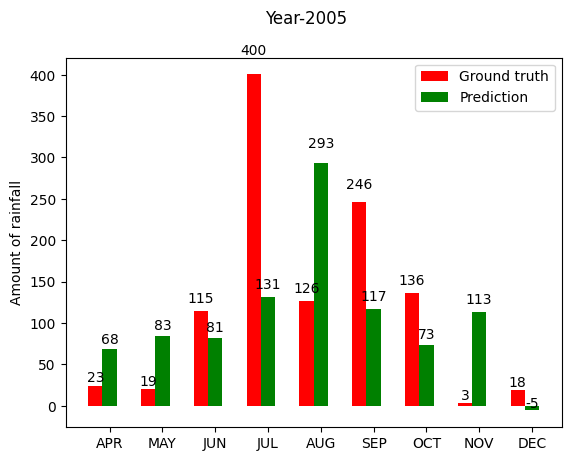

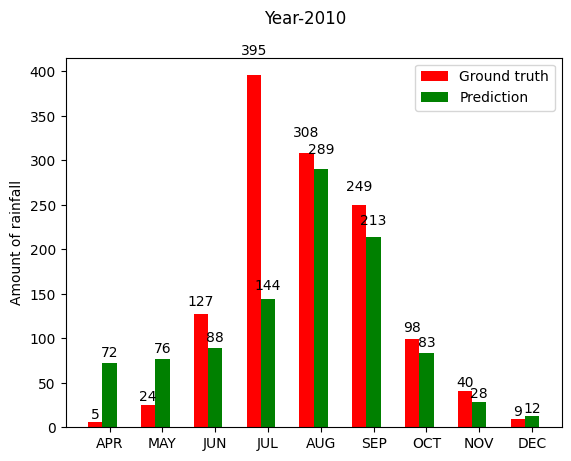

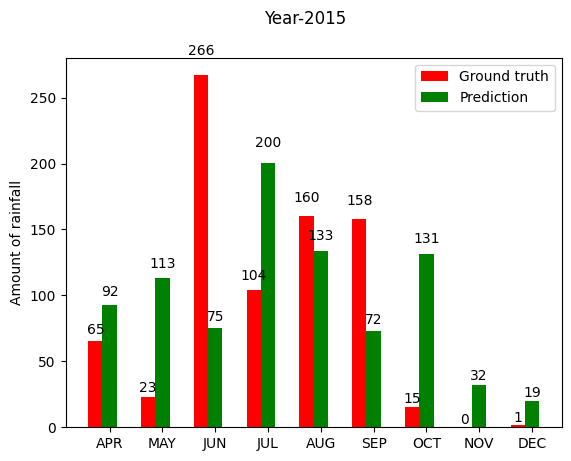

In [50]:
import numpy as np  # Ensure numpy is imported

# Predictions for specific years
y_year_pred_2005 = reg.predict(X_year_2005)
y_year_pred_2010 = reg.predict(X_year_2010)
y_year_pred_2015 = reg.predict(X_year_2015)

# Statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))

# Plot predictions vs actual values for each year
plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")


In [52]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

115.32415990638656


MEAN 2005
121.2111111111111 106.49798150231585
Standard deviation 2005
123.77066107608005 76.08558540019237
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737332
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


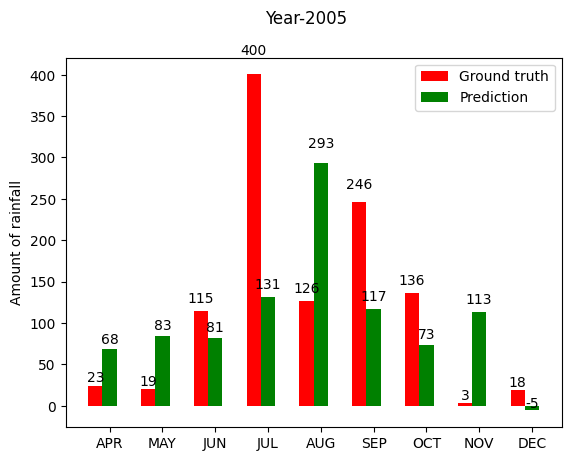

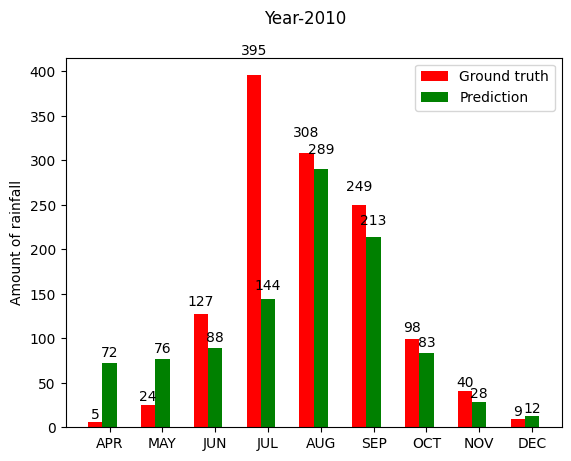

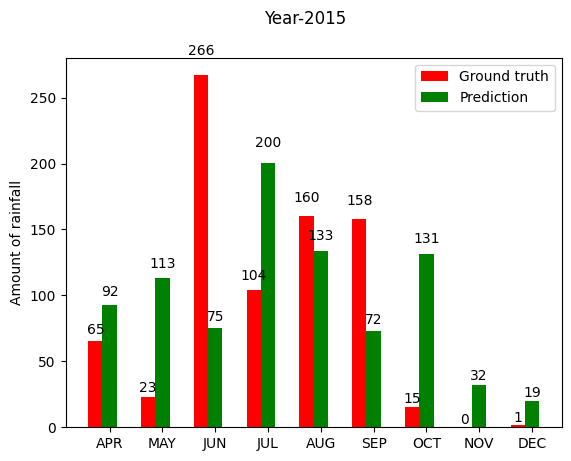

In [53]:
import numpy as np  # Ensure numpy is imported

# Predictions for specific years
y_year_pred_2005 = reg.predict(X_year_2005)
y_year_pred_2010 = reg.predict(X_year_2010)
y_year_pred_2015 = reg.predict(X_year_2015)

# Statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))

# Plot predictions vs actual values for each year
plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")


In [54]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7563.5391 - mae: 65.3306 - val_loss: 5319.9331 - val_mae: 53.4624
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6622.4531 - mae: 59.3964 - val_loss: 4976.8921 - val_mae: 51.3788
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6125.8369 - mae: 57.0695 - val_loss: 4834.8257 - val_mae: 51.3634
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5954.1807 - mae: 56.5764 - val_loss: 4749.0591 - val_mae: 51.2974
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6312.9985 - mae: 59.0371 - val_loss: 4669.7549 - val_mae: 50.6818
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5744.6426 - mae: 55.4790 - val_loss: 4579.4473 - val_mae: 50.2487
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5629.1924 - mae: 55.3178 - val_loss: 4551.6074 - val_mae: 50.3293
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6960.6538 - mae: 59.7141 - val_loss: 4467.7617 - val_mae: 49.7716
Epoch 9/

MEAN 2005
121.2111111111111 106.49798150231585
Standard deviation 2005
123.77066107608005 76.08558540019237
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737332
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


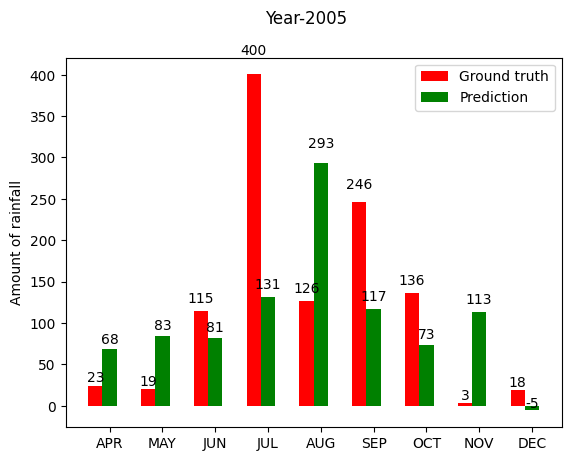

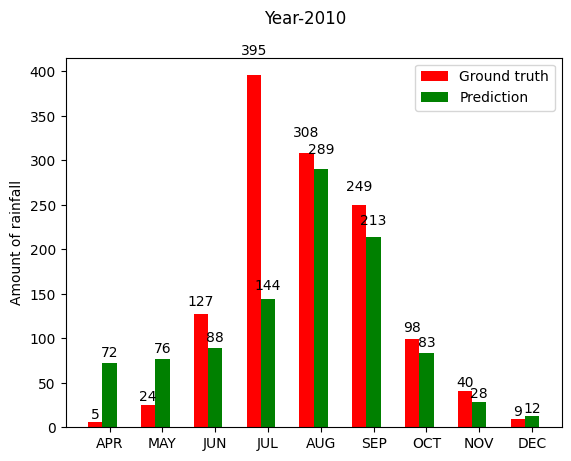

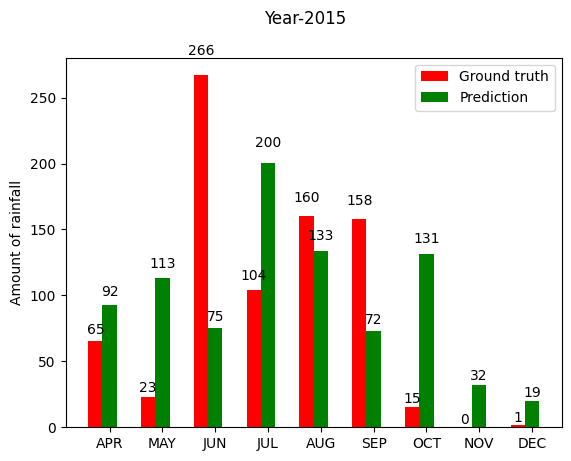

In [55]:
import numpy as np  # Ensure numpy is imported

# Predictions for specific years
y_year_pred_2005 = reg.predict(X_year_2005)
y_year_pred_2010 = reg.predict(X_year_2010)
y_year_pred_2015 = reg.predict(X_year_2015)

# Statistics for 2005
print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))

# Statistics for 2010
print("MEAN 2010")
print(np.mean(y_year_2010), np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)), np.sqrt(np.var(y_year_pred_2010)))

# Statistics for 2015
print("MEAN 2015")
print(np.mean(y_year_2015), np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)), np.sqrt(np.var(y_year_pred_2015)))

# Plot predictions vs actual values for each year
plot_graphs(y_year_2005, y_year_pred_2005, "Year-2005")
plot_graphs(y_year_2010, y_year_pred_2010, "Year-2010")
plot_graphs(y_year_2015, y_year_pred_2015, "Year-2015")


## Prediction Observations

### Training on complete dataset

|Algorithm|MAE|
|---------|---|
|Linear Regression|94.94821727619338|
|SVR|127.74073860203839|
|Artificial neural nets|85.2648713528865|

### Training on telangana dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 70.61463829282977|
|SVR| 90.30526775954294|
|Artificial neural nets |59.95190786532157|

- Neural Networks performs better than SVR etc.
- Observed MAE is very high which indicates machine learning models won't work well for prediction of rainfall.
- Telangana data has a single pattern that can be learned by models, rather than learning different patterns of all states. so has high accuracy.
- Analysed individual year rainfall patterns for 2005, 2010, 2015.
- Approximately close means, noticed less standard deviations.

## District wise details
- Similar to above the number of attributes is same, we don’t have year in this.
- The amount of rainfall in mm for each district is added from 1950-2000.
- We analyse the data individually for the state **Andhra Pradesh**


In [57]:
import pandas as pd

# Load the dataset
district = pd.read_csv(r"D:\Rain prediction\district_wise_rainfall_normal.csv")

# Fill missing values only for numeric columns
district = district.fillna(district.select_dtypes(include=['number']).mean())

# Display the dataset information
district.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [58]:
district.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


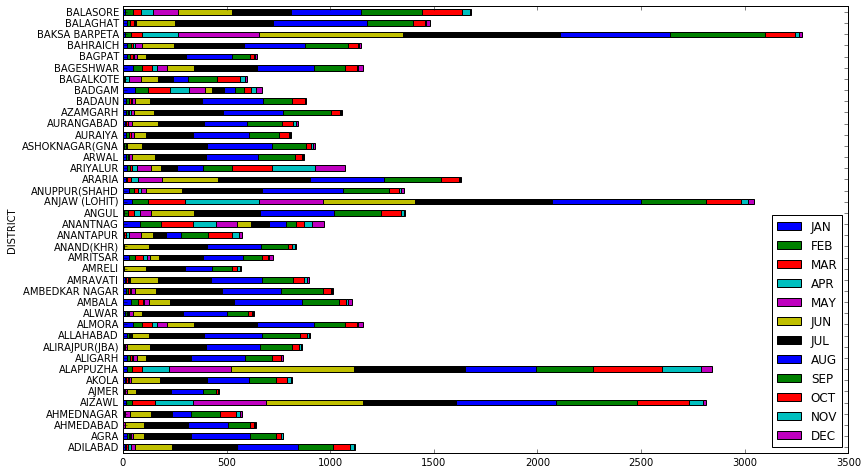

In [ ]:
district[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(13,8));

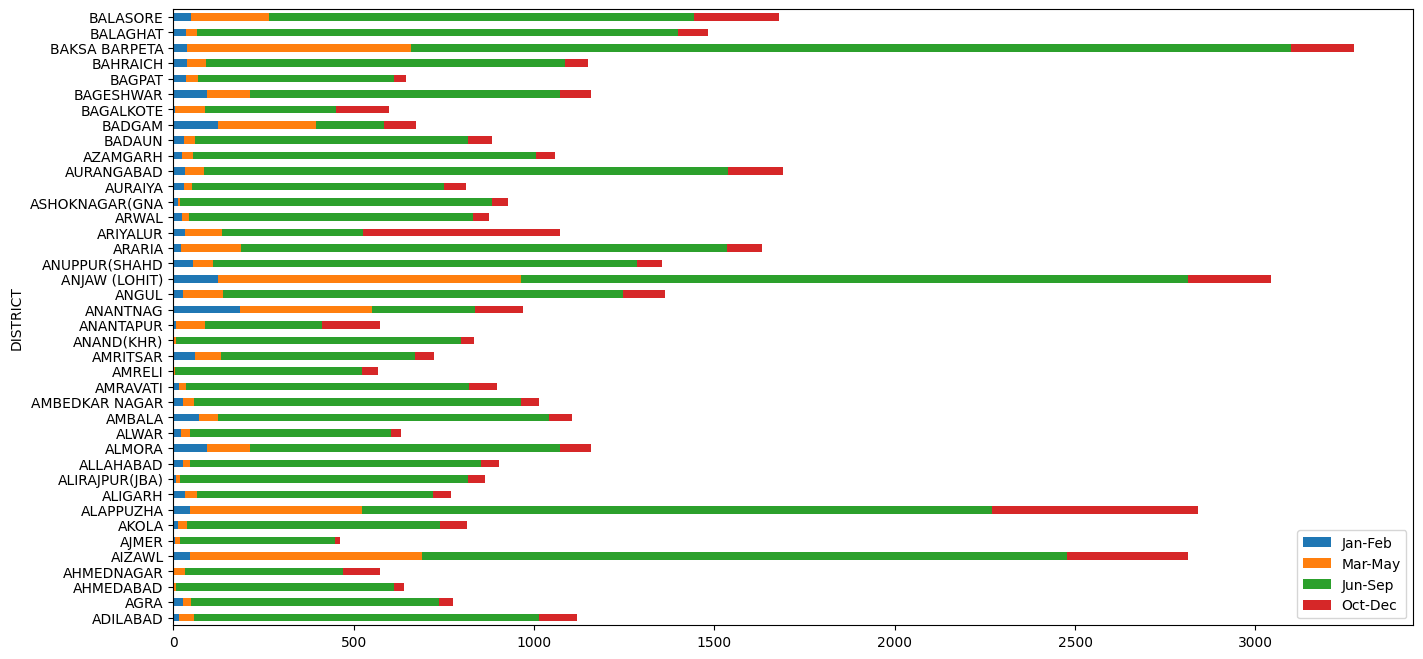

In [59]:
district[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

## Observations
- The above two graphs shows the distribution of over each district.
- As there are large number of districts only 40 were shown in the graphs.

**Andhra Pradesh Data**

In [60]:
ap_data = district[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']

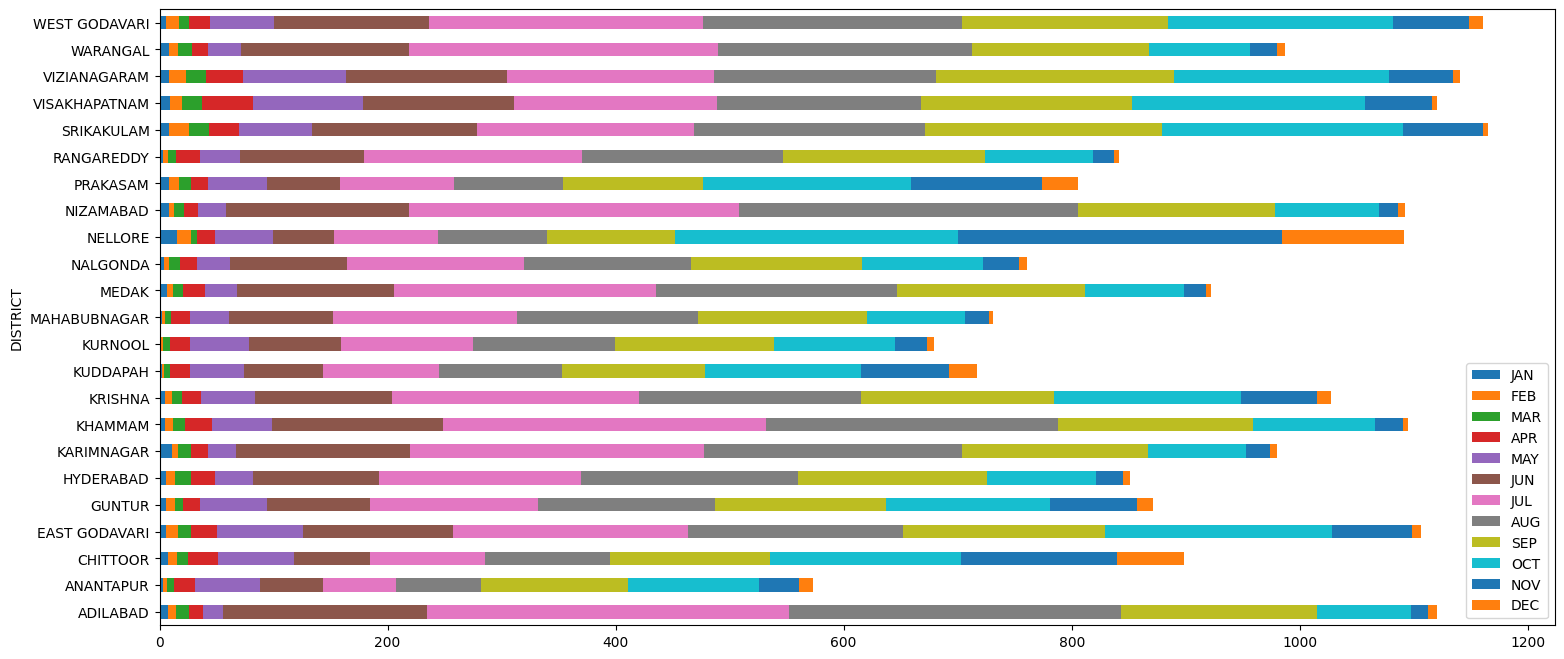

In [61]:
ap_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

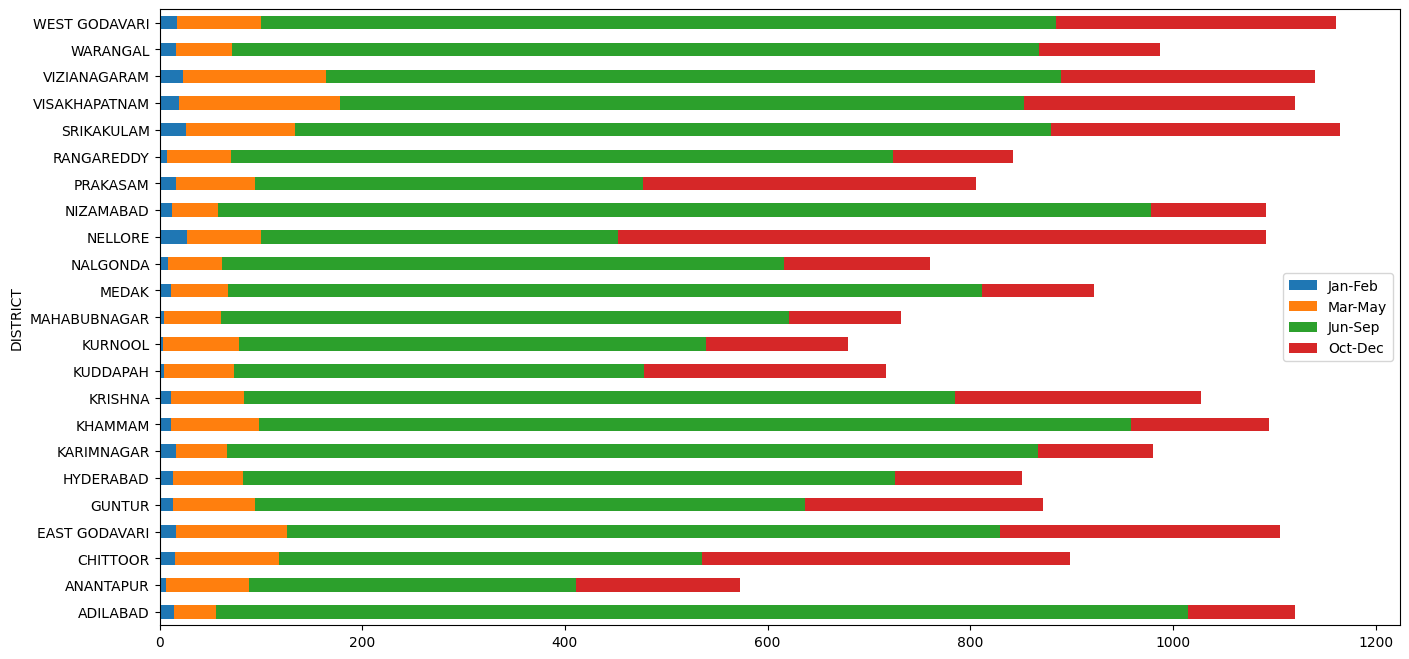

In [62]:
ap_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

## Observations
- The above two graphs shows the distribution of over each district in **Andhra Pradesh**.
- The above graphs show that more amount of rainfall is found in srikakulam district, least amount of rainfall is found in Anantapur district.
- It also shows that almost all states have more amount of rainfall have more amount of rainfall in the months june, july, september.

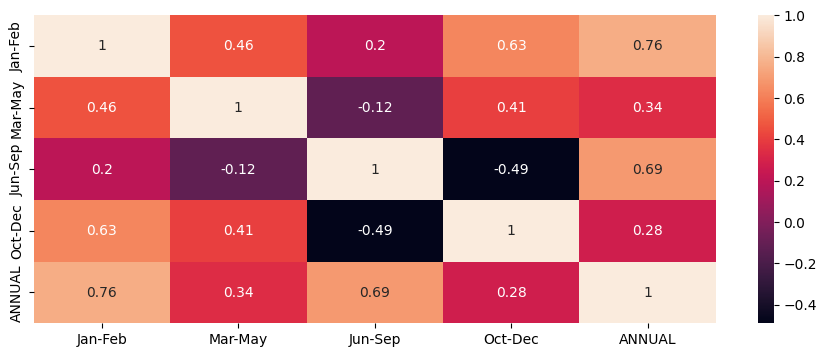

In [63]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

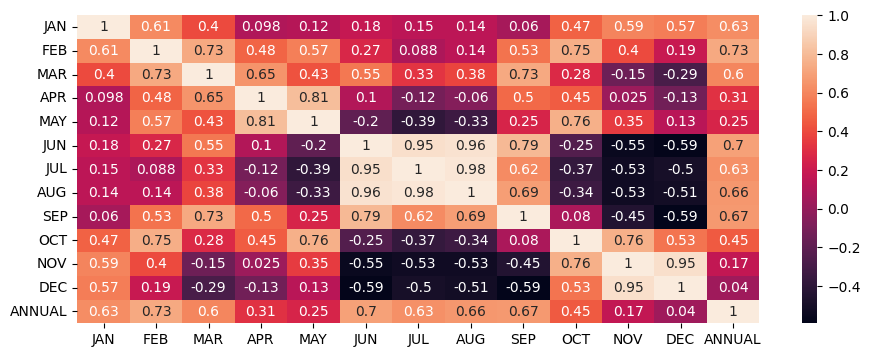

In [64]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- It is observed that in **Andhra Pradesh**, annual rainfall depends more in the months of january, febuary.
- It also shows that if there is rainfall in months march, april, may then there is less amount of rainfall in the months june, july, august, september.

In [65]:
# testing and training for the complete data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(district[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
temp = district[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']
hyd = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'HYDERABAD'])
# print temp
X_year = None; y_year = None
for i in range(hyd.shape[1]-3):
    if X_year is None:
        X_year = hyd[:, i:i+3]
        y_year = hyd[:, i+3]
    else:
        X_year = np.concatenate((X_year, hyd[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, hyd[:, i+3]), axis=0)
 

In [68]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

57.08862331011229


MEAN Hyderabad
91.48888888888888 108.20250522332881
Standard deviation Hyderabad
69.2514651982091 58.90326979488763


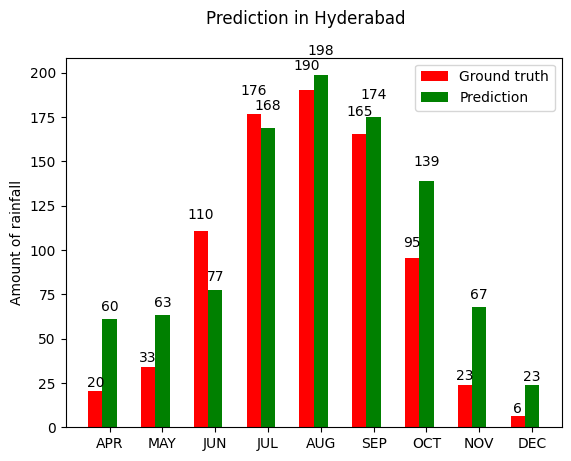

In [71]:
# Predictions for specific year
y_year_pred = reg.predict(X_year)

# Print mean and standard deviation for Hyderabad
print("MEAN Hyderabad")
print(np.mean(y_year), np.mean(y_year_pred))
print("Standard deviation Hyderabad")
print(np.sqrt(np.var(y_year)), np.sqrt(np.var(y_year_pred)))

# Plot the graphs
plot_graphs(y_year, y_year_pred, "Prediction in Hyderabad")


In [72]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

116.60671510825178


MEAN Hyderabad
91.48888888888888 80.34903236716154
Standard deviation Hyderabad
69.2514651982091 0.14736007434982146


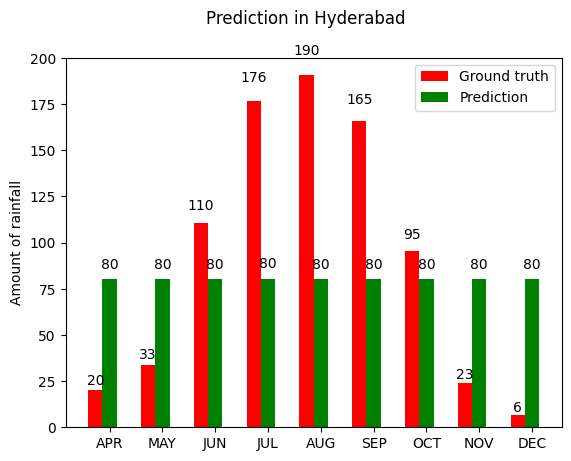

In [74]:
y_year_pred = clf.predict(X_year)

# Print the mean and standard deviation for Hyderabad
print("MEAN Hyderabad")
print(np.mean(y_year), np.mean(y_year_pred))

print("Standard deviation Hyderabad")
print(np.sqrt(np.var(y_year)), np.sqrt(np.var(y_year_pred)))

# Plot the graphs
plot_graphs(y_year, y_year_pred, "Prediction in Hyderabad")


In [75]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9482.9414 - mae: 60.6555 - val_loss: 4115.4956 - val_mae: 41.1032
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6071.2920 - mae: 46.1890 - val_loss: 3765.6907 - val_mae: 37.5804
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5006.3535 - mae: 43.6565 - val_loss: 3629.2061 - val_mae: 38.1657
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5013.9268 - mae: 43.1113 - val_loss: 4124.6533 - val_mae: 39.5012
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4817.3872 - mae: 41.8764 - val_loss: 3586.0396 - val_mae: 36.8360
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5087.7485 - mae: 43.0196 - val_loss: 3684.3992 - val_mae: 37.2983
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5480.6528 - mae: 42.4214 - val_loss: 3658.1521 - val_mae: 37.3280
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4860.6255 - mae: 41.8178 - val_loss: 3752.0647 - val_mae: 37.3443
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MEAN Hyderabad
91.48888888888888 105.84409
Standard deviation Hyderabad
69.2514651982091 75.31941


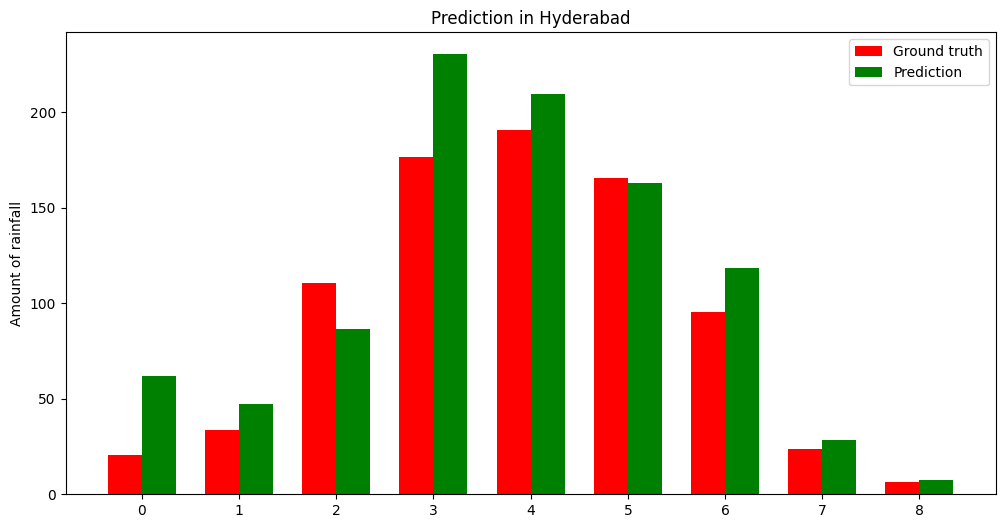

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' and 'X_year' are already defined and trained

# Generate predictions
y_year_pred = model.predict(np.expand_dims(X_year, axis=2))

# Print the mean and standard deviation for Hyderabad
print("MEAN Hyderabad")
print(np.mean(y_year), np.mean(y_year_pred))

print("Standard deviation Hyderabad")
print(np.sqrt(np.var(y_year)), np.sqrt(np.var(y_year_pred)))

# Plot the graphs
def plot_graphs(groundtruth, prediction, title):
    # Flatten the data to ensure it's 1D
    groundtruth = np.ravel(groundtruth)
    prediction = np.ravel(prediction)

    # Ensure the bar plot doesn't overlap
    width = 0.35
    ind = np.arange(len(groundtruth))

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    # Create the bar plots for ground truth and prediction
    rects1 = ax.bar(ind - width / 2, groundtruth, width, color='r', label='Ground truth')
    rects2 = ax.bar(ind + width / 2, prediction, width, color='g', label='Prediction')

    # Customize the plot with labels and title
    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind)
    ax.set_xticklabels(ind)
    ax.set_title(title)
    ax.legend()

    # Display the plot
    plt.show()

# Calling the function to plot the graphs
plot_graphs(y_year, y_year_pred, "Prediction in Hyderabad")


In [81]:
# training and testing sets for only andhra pradesh data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(ap_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

31.249748674622488


MEAN Hyderabad
91.48888888888888 96.54891993068443
Standard deviation Hyderabad
69.2514651982091 60.81935519544688


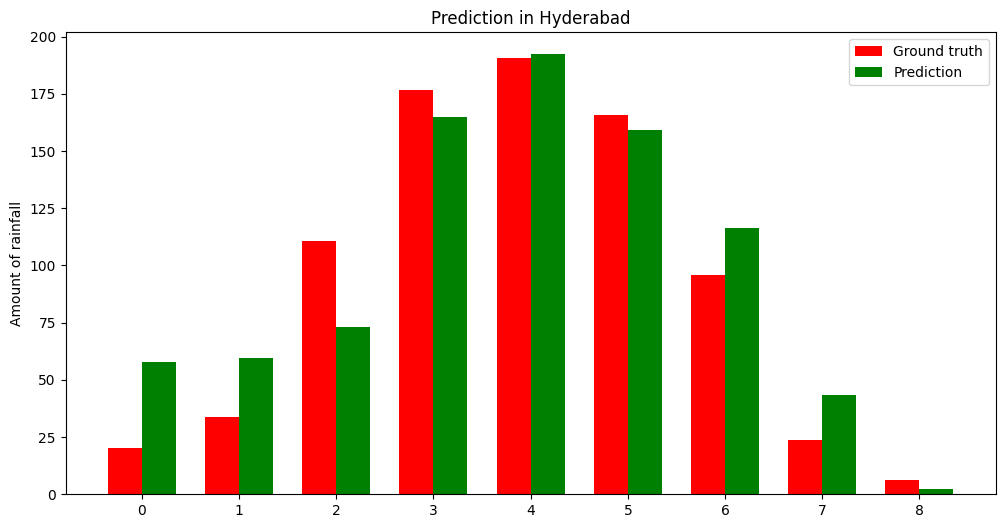

In [84]:
# Assuming reg is your trained model and X_year is your input data

# Get the predicted values
y_year_pred = reg.predict(X_year)

# Print the mean and standard deviation for Hyderabad
print("MEAN Hyderabad")
print(np.mean(y_year), np.mean(y_year_pred))

print("Standard deviation Hyderabad")
print(np.sqrt(np.var(y_year)), np.sqrt(np.var(y_year_pred)))

# Plot the graphs
def plot_graphs(groundtruth, prediction, title):
    # Flatten the data to ensure it's 1D
    groundtruth = np.ravel(groundtruth)
    prediction = np.ravel(prediction)

    # Ensure the bar plot doesn't overlap
    width = 0.35
    ind = np.arange(len(groundtruth))

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    # Create the bar plots for ground truth and prediction
    rects1 = ax.bar(ind - width / 2, groundtruth, width, color='r', label='Ground truth')
    rects2 = ax.bar(ind + width / 2, prediction, width, color='g', label='Prediction')

    # Customize the plot with labels and title
    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind)
    ax.set_xticklabels(ind)
    ax.set_title(title)
    ax.legend()

    # Display the plot
    plt.show()

# Calling the function to plot the graphs
plot_graphs(y_year, y_year_pred, "Prediction in Hyderabad")


In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

59.35057496896855


MEAN Hyderabad
91.48888888888888 80.34903236716154
Standard deviation hyderabad
69.2514651982091 0.14736007434982146


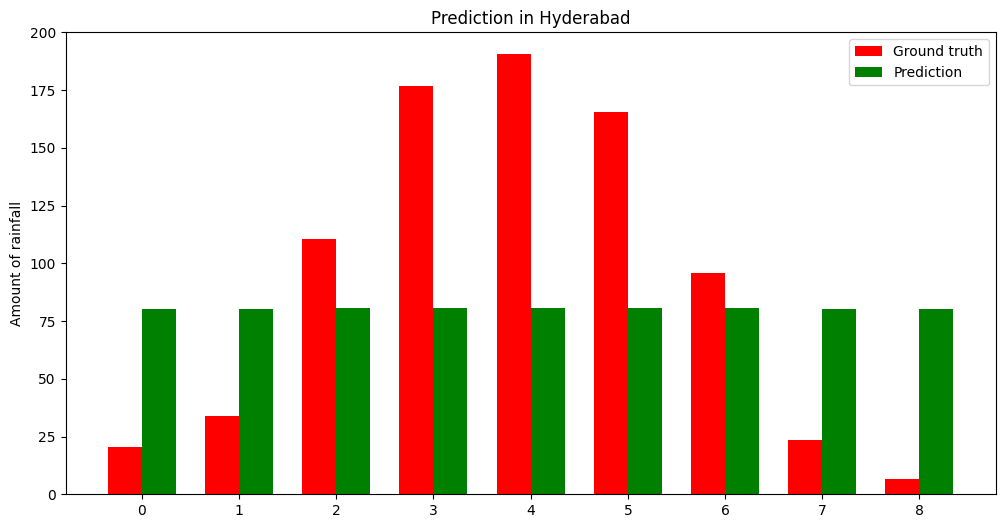

In [87]:
y_year_pred = clf.predict(X_year)
print ("MEAN Hyderabad")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation hyderabad")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")


In [88]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1677.0970 - mae: 29.9496 - val_loss: 1212.0518 - val_mae: 25.8149
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1492.3328 - mae: 28.6044 - val_loss: 1095.2905 - val_mae: 24.7310
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1499.1150 - mae: 28.0933 - val_loss: 1074.1735 - val_mae: 25.4184
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1478.8137 - mae: 27.8516 - val_loss: 1081.5068 - val_mae: 25.7964
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1512.9333 - mae: 27.8483 - val_loss: 1098.5649 - val_mae: 26.0125
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1495.0194 - mae: 27.4072 - val_loss: 1119.2783 - val_mae: 26.1110
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1387.8579 - mae: 26.2471 - val_loss: 1134.8586 - val_mae: 26.0622
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1355.7592 - mae: 26.4104 - val_loss: 1123.2303 - val_mae: 25.6040
Epoch 9/10
3/3 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MEAN Hyderabad
91.48888888888888 96.23145
Standard deviation hyderabad
69.2514651982091 64.20657


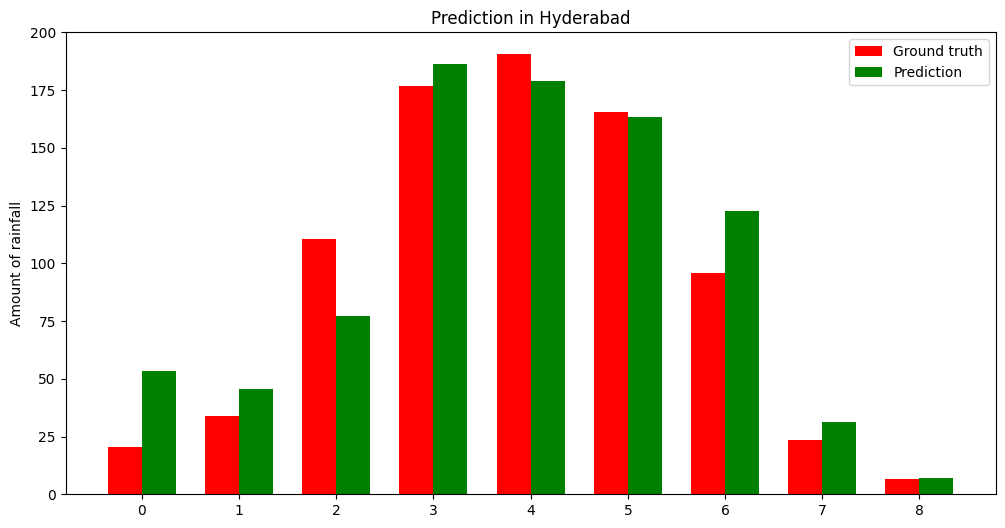

In [89]:
y_year_pred = model.predict(np.expand_dims(X_year, axis=2))
print ("MEAN Hyderabad")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation hyderabad")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")


## Prediction Observations

### Training on complete dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 57.08862331011236|
|SVR| 116.60671510825178|
|Artificial neural nets |44.329664907381066|

### Training on telangana dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 31.249748674622477|
|SVR| 59.35057496896855|
|Artificial neural nets |31.0601823988415|

- Neural Networks performs better than SVR etc.
- Bad performance by SVR model.
- Andhra Pradesh data has a single pattern that can be learned by models, rather than learning different patterns of all states. so has high accuracy.
- Analysed individual year rainfall patterns for Hyderabad district.
- Approximately close means, noticed close standard deviations.